In [81]:
#initializing imports
import csv
from Patient import *
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Ready data from csv file
data = pd.read_csv('./Data.csv')

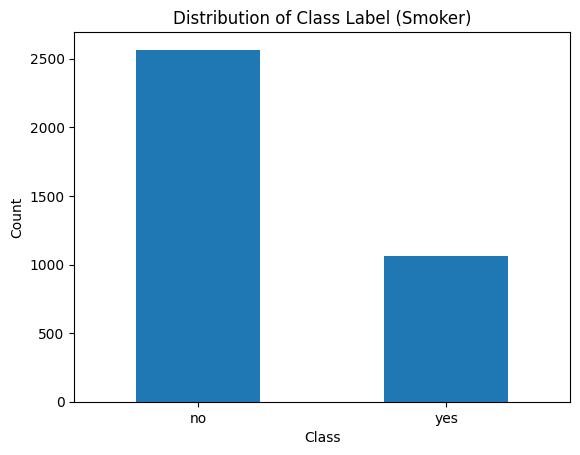

Number of non Smokers resuts: 2566
Number of Smoker resuts: 1064
Data is skewed to the left, since negative results almost more than double positive results


In [71]:
# Task 1 part 2


data['Smoker'].value_counts().plot(kind='bar')

plt.xlabel('Class')

plt.ylabel('Count')
plt.xticks(rotation=0)

plt.title('Distribution of Class Label (Smoker)')

plt.show()

print('Number of non Smokers resuts: ' +
      str(data.loc[data['Smoker'] == 'no'].shape[0]))
print('Number of Smoker resuts: ' +
      str(data.loc[data['Smoker'] == 'yes'].shape[0]))
print('Data is skewed to the left, since negative results almost more than double positive results')

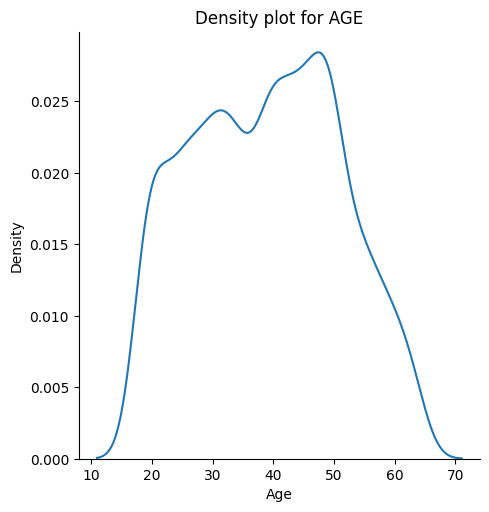

In [63]:
# Task 1 part 2

sb.displot(data['Age'], kind='kde')
plt.title('Density plot for AGE')

plt.show()

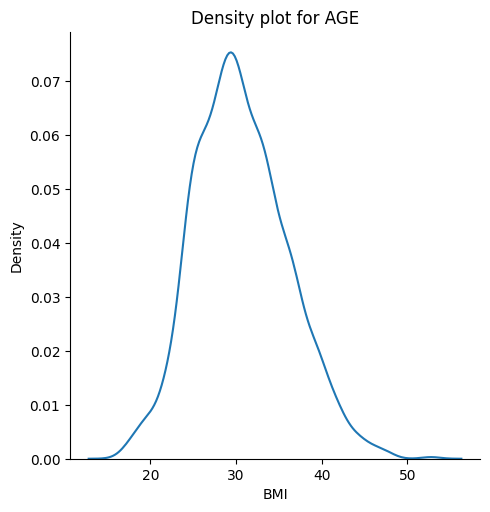

In [30]:
# Task 1 part 3

sb.displot(data['BMI'], kind='kde')
plt.title('Density plot for AGE')

plt.show()

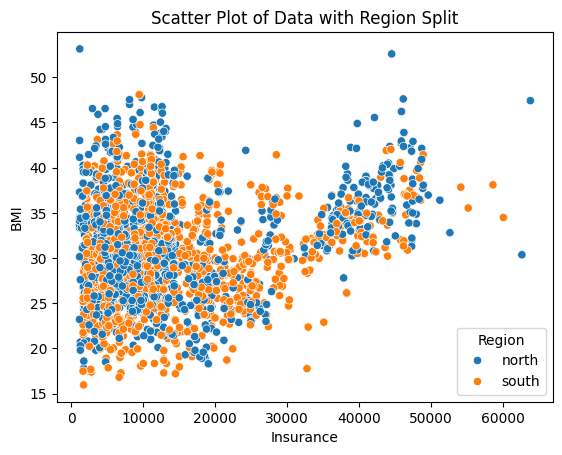

In [72]:

# Scatter plot with different colors for each region
sb.scatterplot(x='Insurance Charges', y='BMI', hue='Region', data=data)
plt.title('Scatter Plot of Data with Region Split')
# Adjusting the plot
plt.xlabel('Insurance')
plt.ylabel('BMI')
plt.legend(title='Region')
plt.show()

In [73]:
# Task 1 part 7

data = data.sample(frac=1)

train_size = int(0.8 * len(data))

train_set = data[:train_size]

test_set = data[train_size:]

0       1
1       1
2       1
3       0
4       0
       ..
3625    0
3626    1
3627    1
3628    0
3629    1
Name: Region, Length: 3630, dtype: object


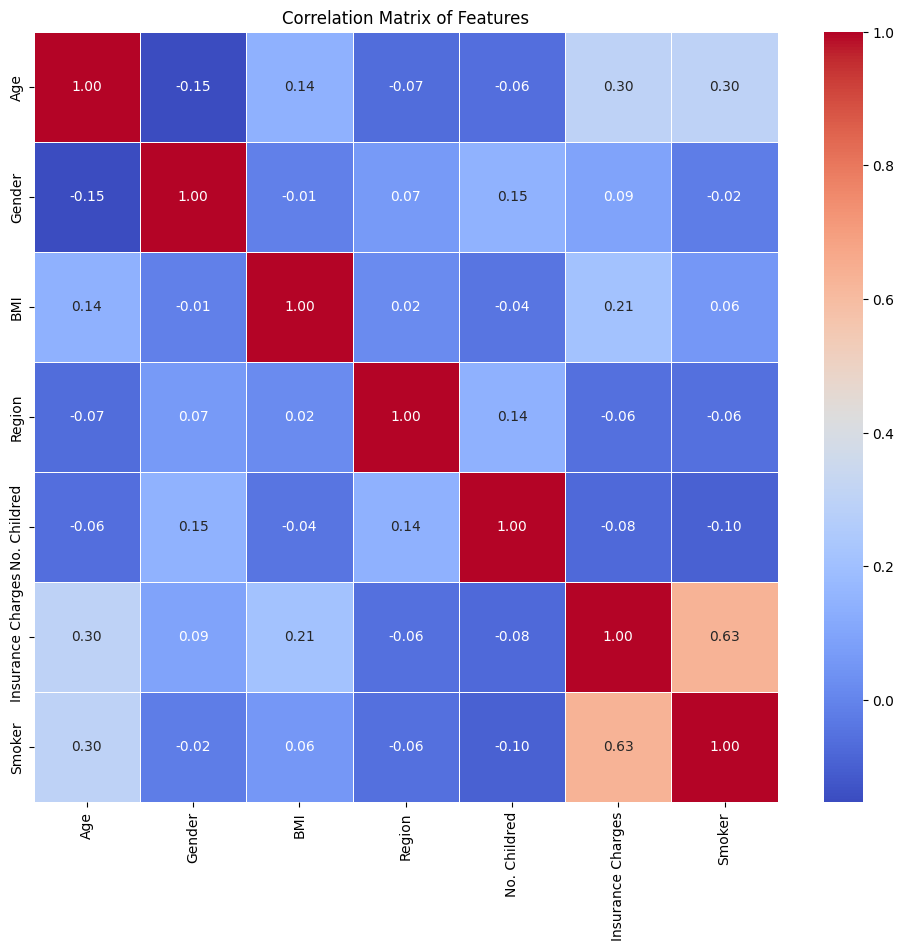

In [77]:
data = pd.read_csv('./Data.csv')
data.loc[data['Region'] == 'north', 'Region'] = 1
data.loc[data['Region'] == 'south', 'Region'] = 0
data.loc[data['Gender'] == 'male', 'Gender'] = 1
data.loc[data['Gender'] == 'female', 'Gender'] = 0
data.loc[data['Smoker'] == 'no', 'Smoker'] = 0
data.loc[data['Smoker'] == 'yes', 'Smoker'] = 1
print (data['Region'])
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [84]:
# 4 Classification knn models fitting and prediction, with accuracy results

from sklearn.metrics import roc_auc_score


yTrain = train_set[['Smoker']]
xTrain = train_set[['Insurance Charges', 'Age','BMI']]
xTest = test_set[['Insurance Charges', 'Age','BMI']]
yTest = test_set[['Smoker']]
k_values = [10,20,30]


C:\Users\saleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.